In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
import pickle

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
# read the data
df = pd.read_csv('train.csv')

df.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [4]:
df.shape

(26298, 6)

In [5]:
y = df['num_sold']
X = df.drop(['num_sold'], axis=1)

In [6]:
# modify the date column to get more information
X['date'] = pd.to_datetime(X['date'])
X['year'] = X['date'].dt.year
X['month'] = X['date'].dt.month
X['day'] = X['date'].dt.day
X['day_of_week'] = X['date'].dt.dayofweek
X['quarter'] = X['date'].dt.quarter
X['is_month_start'] = X['date'].dt.is_month_start
X['is_month_end'] = X['date'].dt.is_month_end
X['is_quarter_start'] = X['date'].dt.is_quarter_start
X['is_quarter_end'] = X['date'].dt.is_quarter_end
X['is_year_start'] = X['date'].dt.is_year_start
X['is_year_end'] = X['date'].dt.is_year_end


In [7]:
X.head()

,row_id,date,country,store,product,year,month,day,day_of_week,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,2015,1,1,3,1,True,False,True,False,True,False
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,2015,1,1,3,1,True,False,True,False,True,False
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,2015,1,1,3,1,True,False,True,False,True,False
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,2015,1,1,3,1,True,False,True,False,True,False
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,2015,1,1,3,1,True,False,True,False,True,False


In [8]:
# drop the date column
X = X.drop(['date'], axis=1)
# drop the id column
X = X.drop(['row_id'], axis=1)

In [9]:
X.head()

,country,store,product,year,month,day,day_of_week,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
0,Finland,KaggleMart,Kaggle Mug,2015,1,1,3,1,True,False,True,False,True,False
1,Finland,KaggleMart,Kaggle Hat,2015,1,1,3,1,True,False,True,False,True,False
2,Finland,KaggleMart,Kaggle Sticker,2015,1,1,3,1,True,False,True,False,True,False
3,Finland,KaggleRama,Kaggle Mug,2015,1,1,3,1,True,False,True,False,True,False
4,Finland,KaggleRama,Kaggle Hat,2015,1,1,3,1,True,False,True,False,True,False


## Später onehot encoding benutzen

In [10]:
# show the number of weekdays
X['day_of_week'].value_counts()


day_of_week
3    3762
4    3762
5    3762
6    3762
0    3762
1    3744
2    3744
Name: count, dtype: int64

In [11]:
for col in X.columns:
    if X[col].dtype == 'object':
        print(col, X[col].unique())

country ['Finland' 'Norway' 'Sweden']
store ['KaggleMart' 'KaggleRama']
product ['Kaggle Mug' 'Kaggle Hat' 'Kaggle Sticker']


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 26297
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country           26298 non-null  object
 1   store             26298 non-null  object
 2   product           26298 non-null  object
 3   year              26298 non-null  int32 
 4   month             26298 non-null  int32 
 5   day               26298 non-null  int32 
 6   day_of_week       26298 non-null  int32 
 7   quarter           26298 non-null  int32 
 8   is_month_start    26298 non-null  bool  
 9   is_month_end      26298 non-null  bool  
 10  is_quarter_start  26298 non-null  bool  
 11  is_quarter_end    26298 non-null  bool  
 12  is_year_start     26298 non-null  bool  
 13  is_year_end       26298 non-null  bool  
dtypes: bool(6), int32(5), object(3)
memory usage: 1.3+ MB


In [13]:
#enconde the categorical variables using label encoder
le = preprocessing.LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# save encoder
with open('encoder.pickle', 'wb') as f:
    pickle.dump(le, f)

In [14]:
#change the boolean columns to 0 and 1 type int
X['is_month_start'] = X['is_month_start'].astype(int)
X['is_month_end'] = X['is_month_end'].astype(int)
X['is_quarter_start'] = X['is_quarter_start'].astype(int)
X['is_quarter_end'] = X['is_quarter_end'].astype(int)
X['is_year_start'] = X['is_year_start'].astype(int)
X['is_year_end'] = X['is_year_end'].astype(int)



X.head()

,country,store,product,year,month,day,day_of_week,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
0,0,0,1,2015,1,1,3,1,1,0,1,0,1,0
1,0,0,0,2015,1,1,3,1,1,0,1,0,1,0
2,0,0,2,2015,1,1,3,1,1,0,1,0,1,0
3,0,1,1,2015,1,1,3,1,1,0,1,0,1,0
4,0,1,0,2015,1,1,3,1,1,0,1,0,1,0


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 26297
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   country           26298 non-null  int64
 1   store             26298 non-null  int64
 2   product           26298 non-null  int64
 3   year              26298 non-null  int32
 4   month             26298 non-null  int32
 5   day               26298 non-null  int32
 6   day_of_week       26298 non-null  int32
 7   quarter           26298 non-null  int32
 8   is_month_start    26298 non-null  int64
 9   is_month_end      26298 non-null  int64
 10  is_quarter_start  26298 non-null  int64
 11  is_quarter_end    26298 non-null  int64
 12  is_year_start     26298 non-null  int64
 13  is_year_end       26298 non-null  int64
dtypes: int32(5), int64(9)
memory usage: 2.3 MB


In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [17]:
# build the model
rf = RandomForestRegressor(n_estimators=100, random_state=123)
rf.fit(x_train, y_train)


RandomForestRegressor(random_state=123)

In [21]:
# calculate the mean squared error
y_pred = rf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE: ', mse)

# print the r2 score
r2 = rf.score(x_test, y_test)
print('R2: ', r2)

MSE:  1728.720881596958
R2:  0.97519411103457


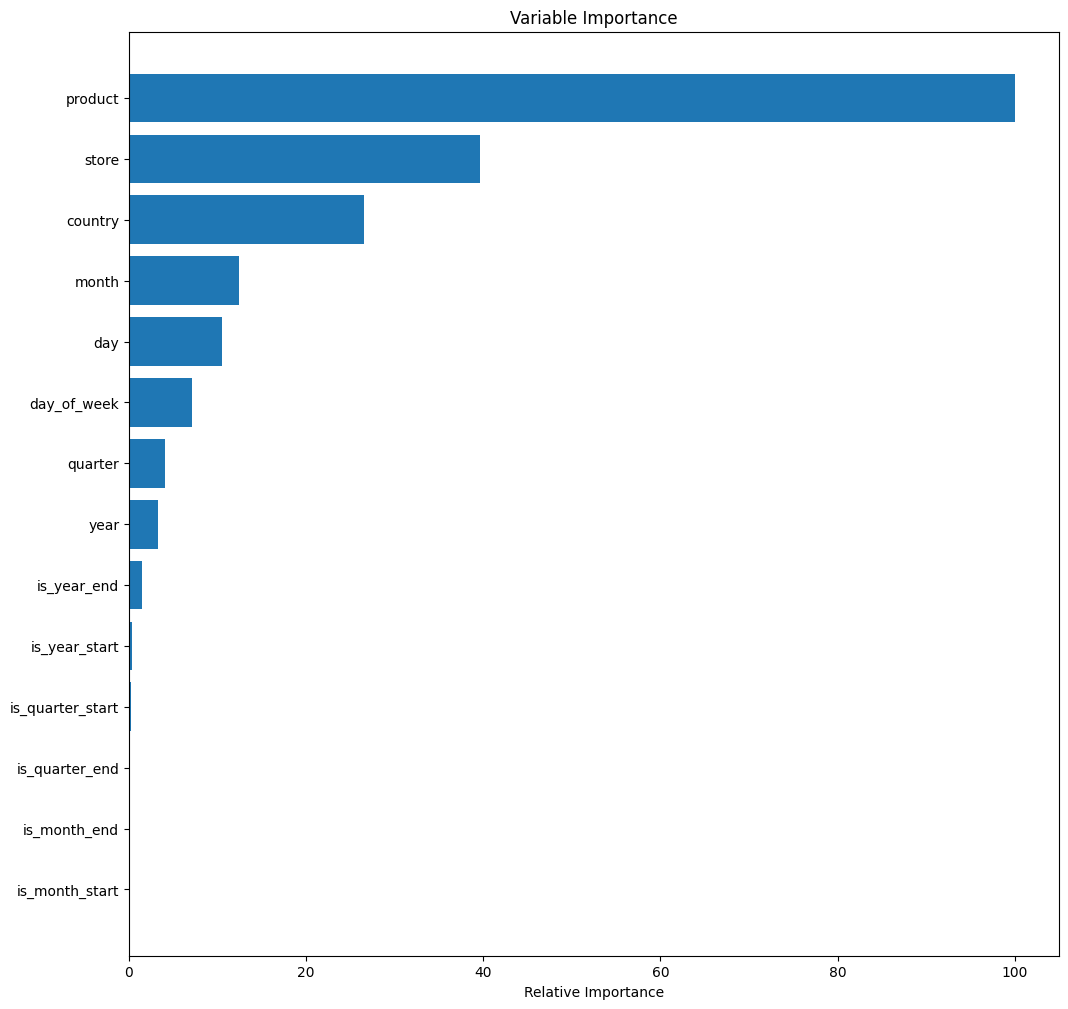

In [19]:
# calculate the feature importance and plot it as a bar chart
feature_importance = rf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 12))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


In [20]:
# save the model
pickle.dump(rf, open('model.pkl_label_encoder', 'wb'))